## Figure 1 simulations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
# 1. initial conditions
C0 = 0.2                    # initial population
M0 = 0.01                   # initial M
X0 = 0.01                   # initial X
y0 = [C0, M0, X0]           # initial condition vector

# other trajectory initial conditions
C02 = 0.1
M02 = 0.4
X02 = 0.01
y02 = [C02, M02, X02]

K_1 = 0.1
K_2 = 0.1
K_3 = 0.1
K_4 = 0.1
V_M1 = 0.5
V_2 = 0.167
V_M3 = 0.2
V_4 = 0.1
v_i = 0.023
v_d = 0.1
K_c = 0.3
K_d = 0.02
k_d = 0.00333


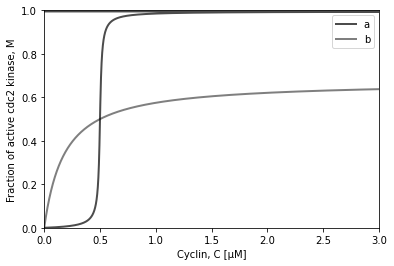

In [3]:
# ignoring divide by zero error
np.seterr(divide='ignore', invalid='ignore')


# 1. parameters

V_M1 = 3
V_2 = 1.5
K_c = 0.5
V_4 = 0.5


# function 'steady_state1' to solve dM/dt = 0

def steady_state1(m1, K_i):
    m = m1
    K = K_i
    
    J = (V_2*m*(K + (1-m))) / ((K + m)*(1-m))
    
    C_m = (J*K_c) / (V_M1 - J)
    return C_m

# concentration intervals

m1_start = 0.0
m1_end = 1.0

m1 = np.linspace(0.0, 1.0, 10000)

# other parameters to plot other curves
k_i1= 0.005
k_i2= 10

result_ss1 = steady_state1(m1, k_i1)
result_ss2 = steady_state1(m1, k_i2)

# get rid of asympotes
utol = 100.
ltol = -100


result_ss1[result_ss1>utol] = np.inf
result_ss1[result_ss1<ltol] = np.inf

result_ss2[result_ss2>utol] = np.inf
result_ss2[result_ss2<ltol] = np.inf

# plot results

fig = plt.figure()
plt.plot(result_ss1, m1,  alpha=0.7, color='k',linewidth=2.0, label = 'a')
plt.plot(result_ss2, m1,  alpha=0.5, color='k',linewidth=2.0, label = 'b')
plt.xlabel("Cyclin, C [μM]")
plt.ylabel('Fraction of active cdc2 kinase, M')

plt.legend()

plt.xlim([0, 3])
plt.ylim([0, 1])

fig.savefig('fig2_1.pdf')

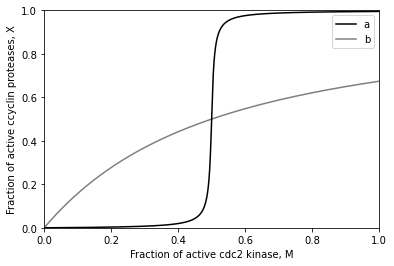

In [4]:
# 1. parameters

V_M1 = 3
V_2 = 1.5
K_c = 0.5
V_4 = 0.5
V_M3 = 1


# fraction intervals
x1 = np.linspace(0.0, 1, 10000)


# function 'steady_state1' to solve dX/dt = 0, function M(X) found
def steady_state2(x1, K_i):
    x = x1
    K = K_i
    
    M_x = (V_4 * x * ( K + (1 - x))) / (V_M3 * (1 - x) * (K + x))
    return M_x

          

# get solutions for different parameters
result2_ss1 = steady_state2(x1, k_i1)
result2_ss2 = steady_state2(x1, k_i2)


# plot results
fig = plt.figure()
plt.plot( result2_ss1, x1,  alpha=1, color='k', label = 'a')
plt.plot( result2_ss2, x1, alpha=0.5, color='k', label = 'b')

plt.xlabel("Fraction of active cdc2 kinase, M")
plt.ylabel('Fraction of active ccyclin proteases, X')


plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
fig.savefig('fig2_2.pdf')

## Modifications Fig. 1

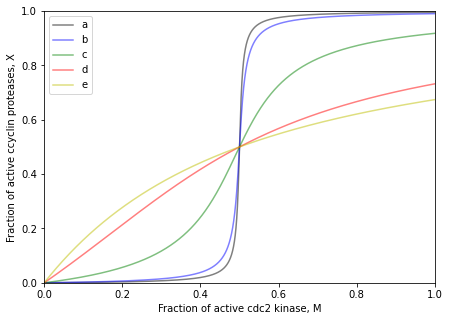

In [5]:
# 1. parameters

V_M1 = 3
V_2 = 1.5
K_c = 0.5
V_4 = 0.5
V_M3 = 1


# fraction intervals
x1 = np.linspace(0.0, 1, 10000)


# function 'steady_state1' to solve dX/dt = 0, function M(X) found
def steady_state2(x1, K_i):
    x = x1
    K = K_i
    
    M_x = (V_4 * x * ( K + (1 - x))) / (V_M3 * (1 - x) * (K + x))
    return M_x


K_i = [0.005, 0.01, 0.1, 1, 10]

# get solutions for different parameters
result2_ss_1 = steady_state2(x1, K_i[0])
result2_ss_2 = steady_state2(x1, K_i[1])
result2_ss_3 = steady_state2(x1, K_i[2])
result2_ss_4 = steady_state2(x1, K_i[3])
result2_ss_5 = steady_state2(x1, K_i[4])

# plot results
fig = plt.figure(figsize = (7,5))
plt.plot( result2_ss_1, x1,  alpha=0.5, color='k', label = "a")
plt.plot( result2_ss_2, x1, alpha=0.5, color='b', label = "b")
plt.plot( result2_ss_3, x1, alpha=0.5, color='g', label = "c")
plt.plot( result2_ss_4, x1, alpha=0.5, color='r', label = "d")
plt.plot( result2_ss_5, x1, alpha=0.5, color='y', label = "e")

plt.xlabel("Fraction of active cdc2 kinase, M")
plt.ylabel('Fraction of active ccyclin proteases, X')

plt.legend()

plt.xlim([0, 1])
plt.ylim([0, 1])

fig.savefig('fig2_2mod.pdf')

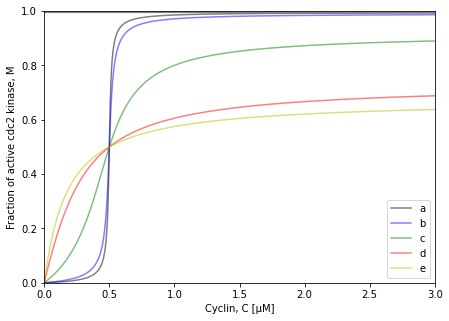

In [6]:
K_i = [0.005, 0.01, 0.1, 1, 10]

# get solutions for different parameters
result1_ss_1 = steady_state1(x1, K_i[0])
result1_ss_2 = steady_state1(x1, K_i[1])
result1_ss_3 = steady_state1(x1, K_i[2])
result1_ss_4 = steady_state1(x1, K_i[3])
result1_ss_5 = steady_state1(x1, K_i[4])

# get rid of asymptotes
utol = 100.
ltol = -100

result1_ss_5[result1_ss_5>utol] = np.inf
result1_ss_5[result1_ss_5<ltol] = np.inf

result1_ss_4[result1_ss_4>utol] = np.inf
result1_ss_4[result1_ss_4<ltol] = np.inf

result1_ss_3[result1_ss_3>utol] = np.inf
result1_ss_3[result1_ss_3<ltol] = np.inf

result1_ss_2[result1_ss_2>utol] = np.inf
result1_ss_2[result1_ss_2<ltol] = np.inf

# plot results
fig = plt.figure(figsize = (7,5))
plt.plot( result1_ss_1, x1,  alpha=0.5, color='k', label = "a")
plt.plot( result1_ss_2, x1, alpha=0.5, color='b', label = "b")
plt.plot( result1_ss_3, x1, alpha=0.5, color='g', label = "c")
plt.plot( result1_ss_4, x1, alpha=0.5, color='r', label = "d")
plt.plot( result1_ss_5, x1, alpha=0.5, color='y', label = "e")

plt.xlabel("Cyclin, C [μM]")
plt.ylabel('Fraction of active cdc2 kinase, M')

plt.legend()

plt.xlim([0, 3])
plt.ylim([0, 1])

fig.savefig('fig2_1mod.pdf')

## Figure 2 Simulation

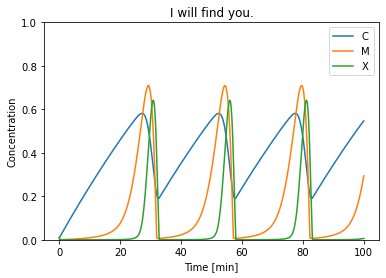

In [7]:
# 1. initial conditions
C0 = 0.01                   # initial population
M0 = 0.01                      # initial zombie population
X0 = 0.01                      # initial death population
y0 = [C0, M0, X0]           # initial condition vector

# 2. parameter values
v_i = 0.025
v_d = 0.25
K_d = 0.02
k_d = 0.01
V_M1 = 3
V_M3 = 1
V_2 = 1.5
V_4 = 0.5
K_c = 0.5
K_1 = 0.005
K_2 = 0.005
K_3 = 0.005
K_4 = 0.005

# time intervals
start = 0.0
end = 100.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

# plot results
plt.figure()
plt.plot(t, C, label='C')
plt.plot(t, M, label='M')
plt.plot(t, X, label='X')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.title('I will find you.')
plt.ylim([0,1])
plt.legend(loc=0)

## Phase diagram simulation

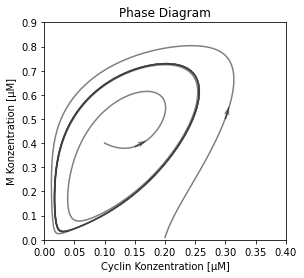

In [4]:
# 1. initial conditions
C0 = 0.2                    # initial population
M0 = 0.01                   # initial M
X0 = 0.01                   # initial X
y0 = [C0, M0, X0]           # initial condition vector

# other trajectory initial conditions
C02 = 0.1
M02 = 0.4
X02 = 0.01
y02 = [C02, M02, X02]

K_1 = 0.1
K_2 = 0.1
K_3 = 0.1
K_4 = 0.1
V_M1 = 0.5
V_2 = 0.167
V_M3 = 0.2
V_4 = 0.1
v_i = 0.023
v_d = 0.1
K_c = 0.3
K_d = 0.02
k_d = 0.00333

# time intervals
start = 0.0
end = 100.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

result2 = odeint(f, y02, t)
C2 = result2[:, 0]
M2 = result2[:, 1]
X2 = result2[:, 2]

# plot results
fig = plt.figure()
plt.plot(C, M,  alpha=0.5, color='k')
plt.plot(C2, M2, alpha=0.5, color='k')
plt.xlabel('Cyclin Konzentration [μM]')
plt.ylabel('M Konzentration [μM]')
plt.title('Phase Diagram')
plt.xlim([0,0.4])
plt.ylim([0,0.9])
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(0.4) #sets the height to width ratio to 0.4 
x_pos = 0.15
y_pos = 0.385
x_direct = 1
y_direct = 0.55

ax.quiver(x_pos,y_pos,x_direct,y_direct, color='grey')
ax.quiver(0.3 , 0.5 ,x_direct, 3.5 , color='grey')
fig.savefig('Phasendiagramm.pdf')

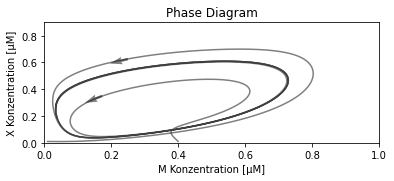

In [32]:
# 1. initial conditions
C0 = 0.2                    # initial C
M0 = 0.01                   # initial M
X0 = 0.01                   # initial X
y0 = [C0, M0, X0]           # initial condition vector

# other trajectory initial conditions
C02 = 0.1
M02 = 0.4
X02 = 0.01
y02 = [C02, M02, X02]

K_1 = 0.1
K_2 = 0.1
K_3 = 0.1
K_4 = 0.1
V_M1 = 0.5
V_2 = 0.167
V_M3 = 0.2
V_4 = 0.1
v_i = 0.023
v_d = 0.1
K_c = 0.3
K_d = 0.02
k_d = 0.00333

# time intervals
start = 0.0
end = 100.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

result2 = odeint(f, y02, t)
C2 = result2[:, 0]
M2 = result2[:, 1]
X2 = result2[:, 2]

# plot results
fig = plt.figure()
plt.plot(M, X,  alpha=0.5, color='k')
plt.plot(M2, X2, alpha=0.5, color='k')
plt.xlabel('M Konzentration [μM]')
plt.ylabel('X Konzentration [μM]')
plt.title('Phase Diagram')
plt.xlim([0,1])
plt.ylim([0,0.9])
ax = plt.gca()                                   #you first need to get the axis handle
ax.set_aspect(0.4)                               #sets the height to width ratio to 0.4 

#draw arrows
x_pos = 0.173
y_pos = 0.35
x_direct = -1
y_direct = -0.4
ax.quiver(x_pos,y_pos,x_direct,y_direct, color='grey')
ax.quiver(0.25 , 0.625 ,x_direct, -0.25 , color='grey')
fig.savefig('PhasendiagrammXM.pdf')

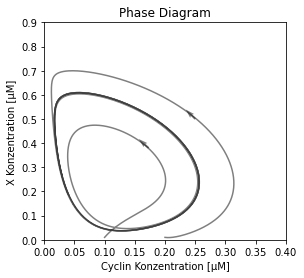

In [12]:
# 1. initial conditions
C0 = 0.2                    # initial C
M0 = 0.01                   # initial M
X0 = 0.01                   # initial X
y0 = [C0, M0, X0]           # initial condition vector

# other trajectory initial conditions
C02 = 0.1
M02 = 0.4
X02 = 0.01
y02 = [C02, M02, X02]

K_1 = 0.1
K_2 = 0.1
K_3 = 0.1
K_4 = 0.1
V_M1 = 0.5
V_2 = 0.167
V_M3 = 0.2
V_4 = 0.1
v_i = 0.023
v_d = 0.1
K_c = 0.3
K_d = 0.02
k_d = 0.00333

# time intervals
start = 0.0
end = 100.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

result2 = odeint(f, y02, t)
C2 = result2[:, 0]
M2 = result2[:, 1]
X2 = result2[:, 2]

# plot results
fig = plt.figure()
plt.plot(C, X,  alpha=0.5, color='k')
plt.plot(C2, X2, alpha=0.5, color='k')
plt.xlabel('Cyclin Konzentration [μM]')
plt.ylabel('X Konzentration [μM]')
plt.title('Phase Diagram')
plt.xlim([0,0.4])
plt.ylim([0,0.9])
ax = plt.gca()                                   #you first need to get the axis handle
ax.set_aspect(0.4)                               #sets the height to width ratio to 0.4 

#draw arrows
x_pos = 0.173
y_pos = 0.38
x_direct = -1
y_direct = 0.9
ax.quiver(x_pos,y_pos,x_direct,y_direct, color='grey')
ax.quiver(0.25 , 0.5 ,x_direct, 1 , color='grey')
fig.savefig('PhasendiagrammXC.pdf')

## Modifications Fig. 2

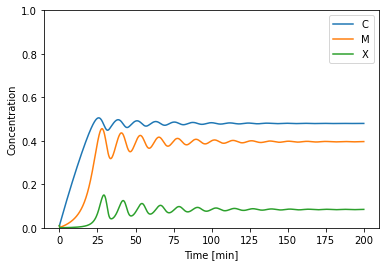

In [6]:
# 1. initial conditions
C0 = 0.01                   # initial population
M0 = 0.01                      # initial zombie population
X0 = 0.01                      # initial death population
y0 = [C0, M0, X0]           # initial condition vector

# 2. parameter values
v_i = 0.025
v_d = 0.25
K_d = 0.02
k_d = 0.01
V_M1 = 3
V_M3 = 1
V_2 = 1.5
V_4 = 0.5
K_c = 0.5
K_1 = 0.025
K_2 = 0.025
K_3 = 0.025
K_4 = 0.025

# time intervals
start = 0.0
end = 200.
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

# plot results
plt.figure()
plt.plot(t, C, label='C')
plt.plot(t, M, label='M')
plt.plot(t, X, label='X')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.ylim([0,1])
plt.legend(loc=0)

fig.savefig('fig2_mod_breakingpoint.pdf')

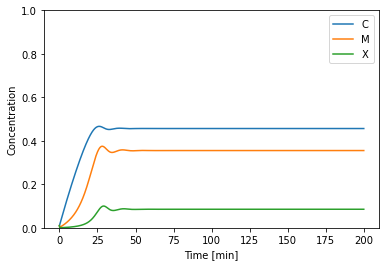

In [7]:
# 1. initial conditions
C0 = 0.01                   # initial population
M0 = 0.01                      # initial zombie population
X0 = 0.01                      # initial death population
y0 = [C0, M0, X0]           # initial condition vector

# 2. parameter values
v_i = 0.025
v_d = 0.25
K_d = 0.02
k_d = 0.01
V_M1 = 3
V_M3 = 1
V_2 = 1.5
V_4 = 0.5
K_c = 0.5
K_1 = 0.04
K_2 = 0.04
K_3 = 0.04
K_4 = 0.04

# time intervals
start = 0.0
end = 200.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

# plot results
plt.figure()
plt.plot(t, C, label='C')
plt.plot(t, M, label='M')
plt.plot(t, X, label='X')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.ylim([0,1])
plt.legend(loc=0)

fig.savefig('fig2_mod_no_osc.pdf')

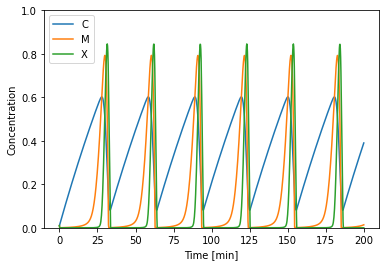

In [8]:
# 1. initial conditions
C0 = 0.01                   # initial population
M0 = 0.01                      # initial zombie population
X0 = 0.01                      # initial death population
y0 = [C0, M0, X0]           # initial condition vector

# 2. parameter values
v_i = 0.025
v_d = 0.25
K_d = 0.02
k_d = 0.01
V_M1 = 3
V_M3 = 1
V_2 = 1.5
V_4 = 0.5
K_c = 0.5
K_1 = 0.002
K_2 = 0.002
K_3 = 0.002
K_4 = 0.002

# time intervals
start = 0.0
end = 200.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

# plot results
plt.figure()
plt.plot(t, C, label='C')
plt.plot(t, M, label='M')
plt.plot(t, X, label='X')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.ylim([0,1])
plt.legend(loc=0)

fig.savefig('fig2_mod_osc.pdf')